# Creating graphs for your data

Submit by February 18, 11:59 PM PST

## Discussions

There are a variety of conventional ways to visualize data - tables, histograms, bar graphs, etc. Now that your data have been managed, it is time to graph your variables. This portion of the project is vital as it will provide readers with visual representations of your data and help you to better display your findings.
Review criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. When relevant, gradients in the scoring will be available to reward clarity (for example, you will get one point for submitting graphs that do not accurately represent your data, but two points if the data is accurately represented). In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. You will be assessed equally on your description of your frequency distributions.

### Specific rubric items, and their point values, are as follows:

* Was a univariate graph created for each of the selected variables? (2 points)
* Was a bivariate graph created for the selected variables? (2 points)
* Did the summary describe what the graphs revealed in terms of the individual variables and the relationship between them? (2 points)

## Instructions

Continue with the program you’ve successfully run.

**STEP 1:** Create graphs of your variables one at a time (univariate graphs).

Examine both their center and spread.

**STEP 2:** Create a graph showing the association between your explanatory and response variables (bivariate graph).

Your output should be interpretable (i.e. organized and labeled).

### WHAT TO SUBMIT:

Once you have written a successful program that creates univariate and bivariate graphs, create a blog entry where you post your program and the graphs that you have created. Write a few sentences describing what your graphs reveal in terms of your individual variables and the relationship between them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
vic = pd.read_csv('2016_census_vic_income_nan.csv')

In [3]:
vic.head()

,postcode,gender,age_low,age_high,income_low,income_high,number
0,POA3000,M,15,19,1.0,149.0,78
1,POA3002,M,15,19,1.0,149.0,6
2,POA3003,M,15,19,1.0,149.0,17
3,POA3004,M,15,19,1.0,149.0,10
4,POA3005,M,15,19,1.0,149.0,0


In [4]:
# gender: P (person)
vic_p = vic[vic['gender'] == 'P']
vic_p['number'].describe()

count    94230.000000
mean        51.286299
std        118.519527
min          0.000000
25%          0.000000
50%          8.000000
75%         47.000000
max       5254.000000
Name: number, dtype: float64

# Distribution of female and male population

I probably need to study seaborn more: https://seaborn.pydata.org/tutorial.html





In [5]:
# Let's recreate the female secondary income variables: income, total_income, age
vic['income'] = (vic['income_low'] + vic['income_high'])/2
vic['total_income'] = vic['income'] * vic['number']
vic['age'] = (vic['age_low'] + vic['age_high'])/2
# make a separate copy so vic stays the same; not necessarily a good idea because it takes more computer memory
vic_f = vic[vic['gender'] == 'F'].copy()
vic_m = vic[vic['gender'] == 'M'].copy()
vic_p = vic[vic['gender'] == 'P'].copy()
# Here I can't use seaborn's countplot because the population numbers have already aggregated (counted).

vic_f_pop= sum(vic_f['number'])
vic_m_pop = sum(vic_m['number'])
# vic_total_population = vic_female_total_population + vic_male_total_population
vic_p = vic[vic['gender'] == 'P']
vic_p_pop = sum(vic_p['number'])

## Looking at the general picture of our data

Assuming you don't have a chance to look at my previous three assignments.

In [6]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282690 entries, 0 to 282689
Data columns (total 10 columns):
postcode        282690 non-null object
gender          282690 non-null object
age_low         282690 non-null int64
age_high        282690 non-null int64
income_low      244998 non-null float64
income_high     244998 non-null float64
number          282690 non-null int64
income          226152 non-null float64
total_income    226152 non-null float64
age             282690 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 21.6+ MB


In [7]:
vic_f.describe()  # numberic data only

,age_low,age_high,income_low,income_high,number,income,total_income,age
count,94230.000000,94230.000000,81666.000000,81666.000000,94230.000000,75384.000000,7.538400e+04,94230.000000
mean,46.666667,55.111111,1023.153846,1022.153846,26.320758,982.875000,1.946200e+04,50.888889
std,23.570351,25.903567,825.140551,825.140551,62.050075,707.450719,5.211651e+04,24.723914
min,15.000000,19.000000,1.000000,0.000000,0.000000,75.000000,0.000000e+00,17.000000
25%,25.000000,34.000000,400.000000,399.000000,0.000000,424.500000,0.000000e+00,29.500000
50%,45.000000,54.000000,800.000000,799.000000,3.000000,812.000000,2.097000e+03,49.500000
75%,65.000000,74.000000,1500.000000,1499.000000,23.000000,1437.000000,1.376550e+04,69.500000
max,85.000000,99.000000,3000.000000,2999.000000,2985.000000,2499.500000,1.132372e+06,92.000000


In [8]:
vic_f.head()

,postcode,gender,age_low,age_high,income_low,income_high,number,income,total_income,age
73290,POA3000,F,15,19,1.0,149.0,149,75.0,11175.0,17.0
73291,POA3002,F,15,19,1.0,149.0,3,75.0,225.0,17.0
73292,POA3003,F,15,19,1.0,149.0,20,75.0,1500.0,17.0
73293,POA3004,F,15,19,1.0,149.0,20,75.0,1500.0,17.0
73294,POA3005,F,15,19,1.0,149.0,3,75.0,225.0,17.0


## Big picture: Male and Female populations

### Total population

Because the data has already been aggregated, we cannot use ___countplot___. We have too add the puplation (number) together manually.

Female Population in Victoria is 2480205. 51.3212%
Male Population in Victoria is 2339649. 48.4128%


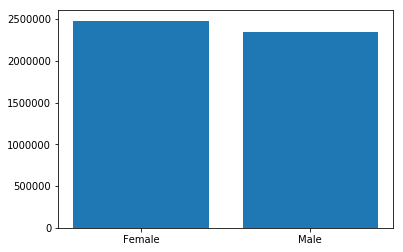

In [9]:
print(f'Female Population in Victoria is {vic_f_pop}. {vic_f_pop/vic_p_pop*100:.4f}%')
print(f'Male Population in Victoria is {vic_m_pop}. {vic_m_pop/vic_p_pop*100:.4f}%')

fig, ax = plt.subplots()
genders = ['Female', 'Male']
pops = [vic_f_pop, vic_m_pop]
plt.bar(genders, pops)
plt.show()

### Distribution of population in the dataset

**univariate distributions**

* Each row of record is a POA (POstal Area)
* We use displot to plot the distribution.
* The graphs show that a very skewed distribution and most populations are very low.


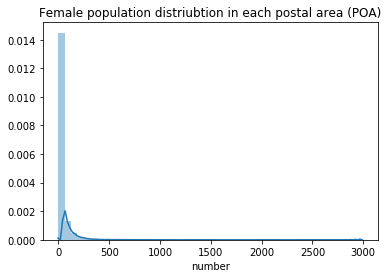

In [10]:
# Here we can see KDE
sns.distplot(vic_f['number'])
plt.title('Female population distriubtion in each postal area (POA)');

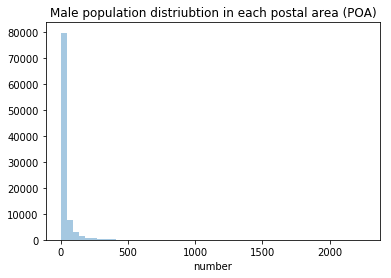

In [11]:
# histogram using distplot with arguments: kde=False, rug=True
sns.distplot(vic_m['number'], kde=False)  # can't really use rug here because the kernel will die on my laptop
plt.title('Male population distriubtion in each postal area (POA)');

# More exploration on population distribution

To help use know the population better, we use a bar chart (barplot) to show us the population distribution in different age groups. We also stack male and female bars together to enable us to make an easy comparision.

Here:

* age - categorical
* gender -categorical
* number (population) - quantitative

The bivariate distribution of our target is age and number. Seaborn's barplot however allows use to include gender here for an easier comparision.


''

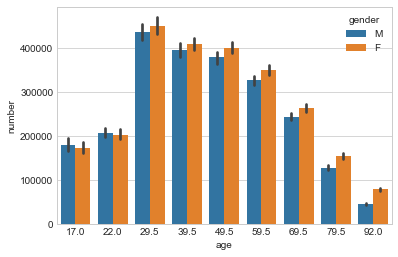

In [12]:
# the age group 92 is for 85 and above (I set the upper bound to 99 so the mean is 92)
sns.set_style("whitegrid")
sns.barplot(x='age', y="number", hue='gender', estimator=sum, data=vic[vic['gender'] != 'P'])
;

In [13]:
# Precise numbers of the graph above
pd.concat([
    vic[vic['gender'] == 'F'].groupby('age')['number'].sum().rename('female number'),
    vic[vic['gender'] == 'M'].groupby('age')['number'].sum().rename('number'),
    ], 
    axis=1)
#vic[vic['gender'] == 'F'].groupby('age')['number'].sum()

,female number,number
age,,
17.0,173204,180620
22.0,202556,207939
29.5,450023,435257
39.5,408445,394229
49.5,400464,377863
59.5,348762,326358
69.5,263502,243598
79.5,154265,127710
92.0,78984,46075


In [14]:
# I used this to figure out that barplot acutally use "estimator" to aggregate data. The default is "mean".
# so I change the estimator to "sum" above
# vic_f[vic_f['age'] == 17.]['number'].count()
# vic_f[vic_f['age'] == 22.]['number'].mean()

In [15]:
# sanity check (only female) - looks already now
(
    vic_f[vic_f['age'] == 17.]['number'].sum(),
    vic_f[vic_f['age'] == 22.]['number'].sum(),
    vic_f[vic_f['age'] == 29.5]['number'].sum(),
    vic_f[vic_f['age'] == 39.5]['number'].sum(),
    vic_f[vic_f['age'] == 49.5]['number'].sum(),
    vic_f[vic_f['age'] == 59.5]['number'].sum(),
    vic_f[vic_f['age'] == 69.5]['number'].sum(),
    vic_f[vic_f['age'] == 79.5]['number'].sum(),
    vic_f[vic_f['age'] == 92]['number'].sum(),
)

(173204, 202556, 450023, 408445, 400464, 348762, 263502, 154265, 78984)

# Analysis each weekly income to discover income inequality or not

First, we would like to explore the general trend so we use factorplot to plot "bar charts" of:
* Female and male populatins in each income bracket (factorplot)
 - I can see different distributions in two charts.
 - From the thrid chart (combined genders), the male porportions are higher than female's in the higher income brackets. I divide the numbers by each female/male population to normalize it but it make very little difference as the male and female populations are close enough.
 - The line graph (fourth chart) shows this trend better. The male group overtakes its counterpart from the bracket of `AU$899.5`.
 - We will continue to dig deeper by including age to see if the data can reveal more stories below.

In [16]:
incomes = vic.groupby(['gender', 'age', 'income'])['number'].sum()
incomes = incomes.reset_index()

vic_f_pop = incomes[incomes['gender']=='F']['number'].sum()
vic_m_pop = incomes[incomes['gender']=='M']['number'].sum()
vic_p_pop = vic_f_pop + vic_m_pop
incomes['percent'] = 0
incomes['percent'] = np.where(incomes['gender'] == 'F', incomes['number']/vic_f_pop, incomes['percent'])
incomes['percent'] = np.where(incomes['gender'] == 'M', incomes['number']/vic_m_pop, incomes['percent'])
incomes['percent'] = np.where(incomes['gender'] == 'P', incomes['number']/vic_p_pop, incomes['percent'])

In [17]:
incomes.head()

,gender,age,income,number,percent
0,F,17.0,75.0,46282,0.023906
1,F,17.0,224.5,18003,0.009299
2,F,17.0,349.5,5887,0.003041
3,F,17.0,449.5,3943,0.002037
4,F,17.0,574.5,3079,0.001590


In [18]:
# somehow not required for seaborn as you can see below
# vic_f['income'] = vic_f['income'].astype('category')
pd.unique(vic_f['income'])

array([   75. ,   224.5,   349.5,   449.5,   574.5,   724.5,   899.5,
        1124.5,  1374.5,  1624.5,  1874.5,  2499.5,     nan])

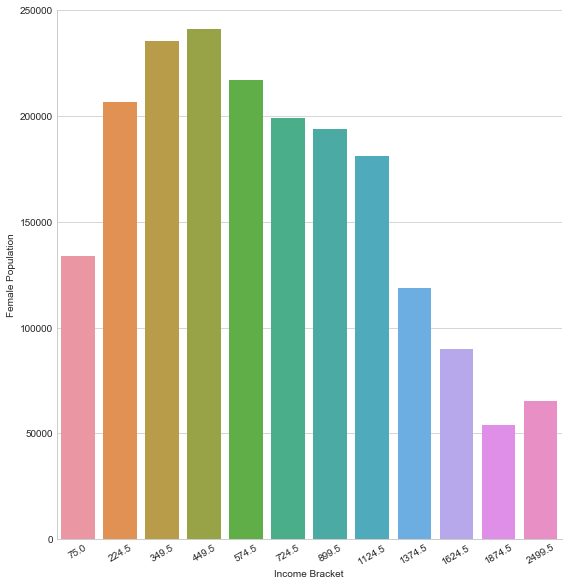

In [19]:
# plt.rcParams["figure.figsize"] = [16,9]
# f, ax = plt.subplots(figsize=(5,6))
from numpy import sum

g = sns.factorplot(x="income", 
                   y="number", 
                   data=incomes[incomes['gender'] == 'F'], 
                   kind="bar",
                   estimator=sum,
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Female Population')
g.set(ylim=(0, 250000));

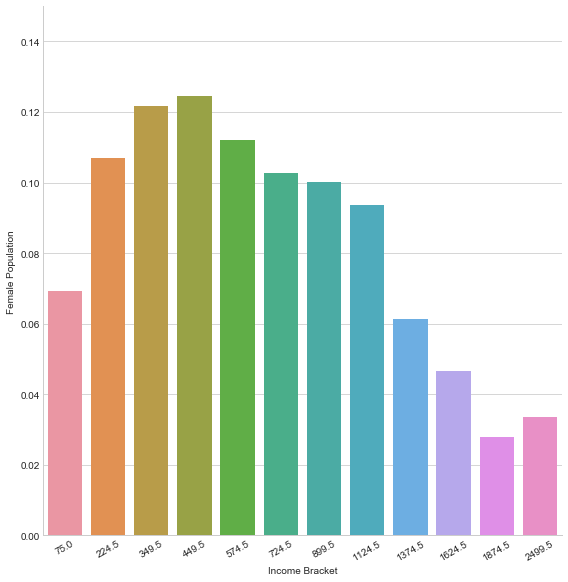

In [20]:
# Normalized by female population
g = sns.factorplot(x="income", 
                   y="percent", 
                   data=incomes[incomes['gender'] == 'F'], 
                   kind="bar",
                   estimator=sum,
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Female Population')
g.set(ylim=(0, .15));

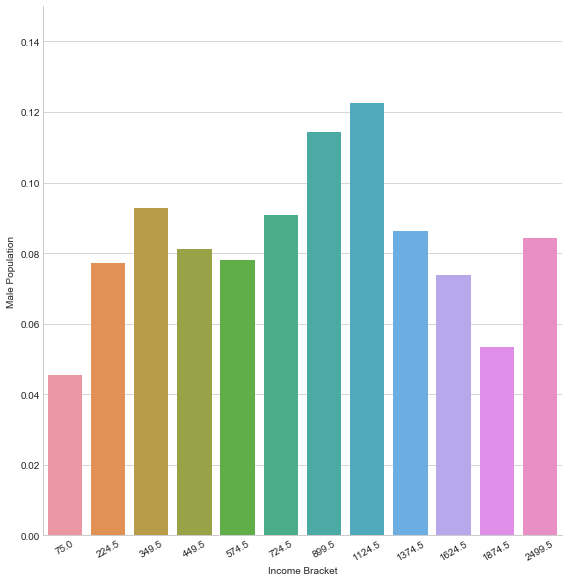

In [21]:
from numpy import sum

g = sns.factorplot(x="income", 
                   y="percent", 
                   data=incomes[incomes['gender'] == 'M'],
                   kind="bar",
                   estimator=sum,
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Male Population')
g.set(ylim=(0, .15));

In [22]:
# use a different dataframe now
# m_pop_by_income = vic_m.groupby('income')['number'].sum().reset_index()
# m_pop_by_income

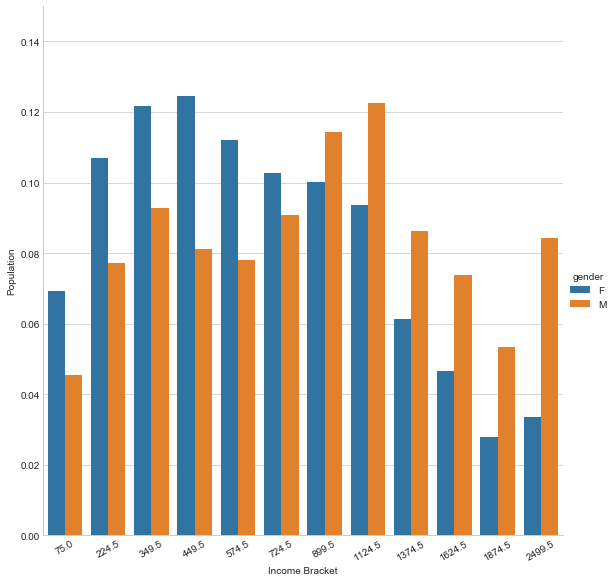

In [23]:
# todo: find better colors later. Like skyblue and pink
g = sns.factorplot(x="income", 
                   y="percent", 
                   data=incomes[incomes['gender'] != 'P'],
                   kind="bar", 
                   estimator=sum,
                   hue='gender',
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Population')
g.set(ylim=(0, .15));

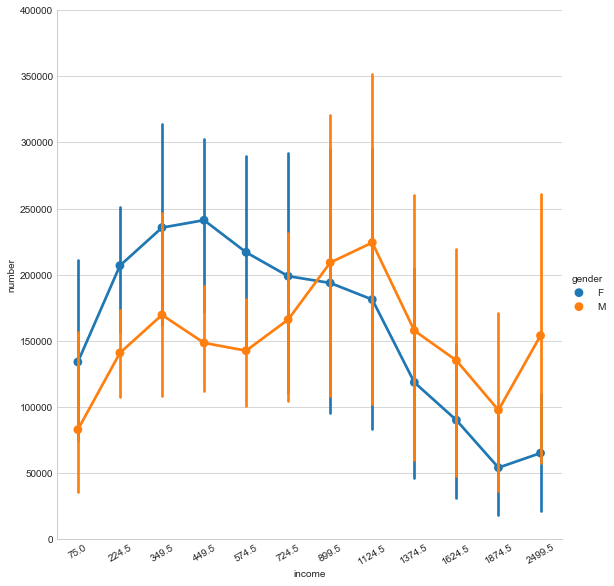

In [24]:
# hue is 'gender'
g = sns.factorplot(x='income', 
                   y="number", 
                   kind='point', 
                   estimator=sum,
                   hue='gender', 
                   data=incomes[incomes['gender']!='P'], 
                   size=8)
g.set_xticklabels(rotation=30)
g.set(ylim=(0, 400000));

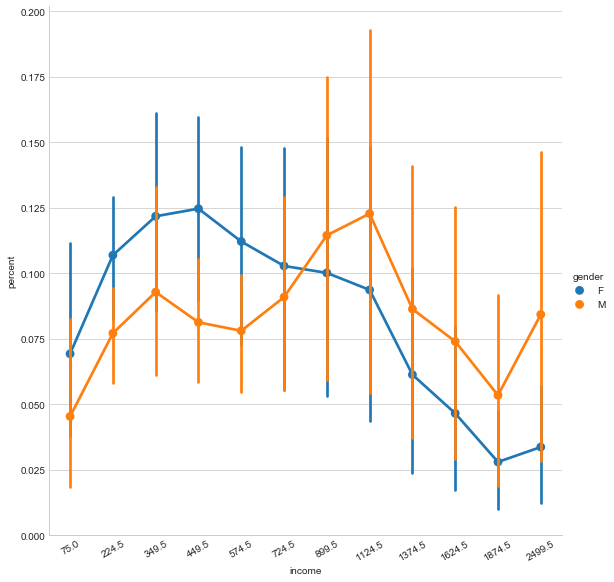

In [25]:
g = sns.factorplot(x='income', 
                   y='percent', 
                   hue='gender',
                   estimator=sum,
                   data=incomes[incomes['gender'] != 'P'],
                   size=8)
g.set_xticklabels(rotation=30)
g.set(ylim=(0, None));

# Explore income distrubtion by age group

* Here seaborn allows us to have multiple age groups shown the the chart.

## Female group
* Age groups, 39.5, 49.5, 29.5, are the three groups clearly separated from the rest.
* 59.5 can be grouped with the group above but it's also more or less in-between.

## Male group
* Age groups, 39.5, 49.5, 29.5, are also the three groups can be separated from the rest.
* 59.5 can also be grouped with the group above (closer than the female group).

## Overall
* The trend in the female and male groups is not particularly different.
* The youngest group (17.0) in both genders has a consistent declining population from low to high incomes.
* Other groups all have a peak. 
  - For females, some peak at the income of 574.5 to 1124.5 and the other peak at around 224.5 to 449.5.
  - For males, some peak at 899.5 to 1375.5 while the other peak at 224.5 and 349.5.


## Points to think

* It is strange to see the senior groups to have income below the age pension. Why? Does it mean they have other assets so they are actually richer.


Minimum wage:

The national minimum wage is currently `$18.29` per hour or `$694.90` per 38 hour week (before tax) in Australia. [source](https://www.fairwork.gov.au/how-we-will-help/templates-and-guides/fact-sheets/minimum-workplace-entitlements/minimum-wages)

Age pension:

| Per fortnight | Single    | Couple each | Couple combined |
| ------------- | --------- | ----------- | --------------- |
| Total         | `$894.40` | `$674.20`   | `$1,348.40`     | 

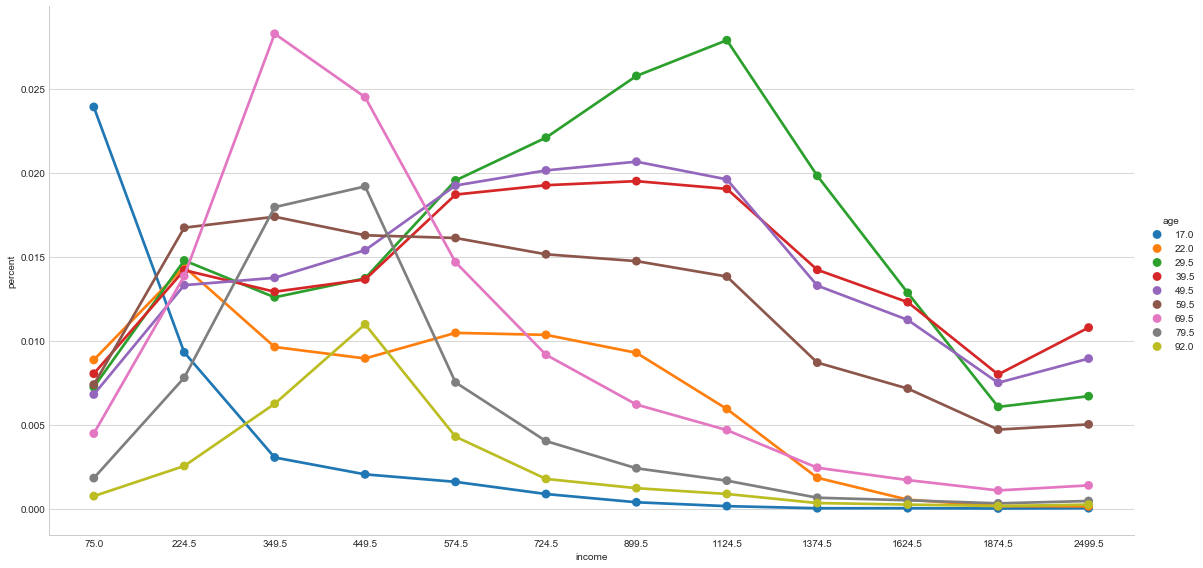

In [26]:
# hue is 'age', female only

g = sns.factorplot(x='income', 
                   y="percent", 
                   kind='point', 
                   hue='age', 
                   data=incomes[incomes['gender'] == 'F'], 
                   estimator=sum, 
                   size=8,
                   aspect=2)


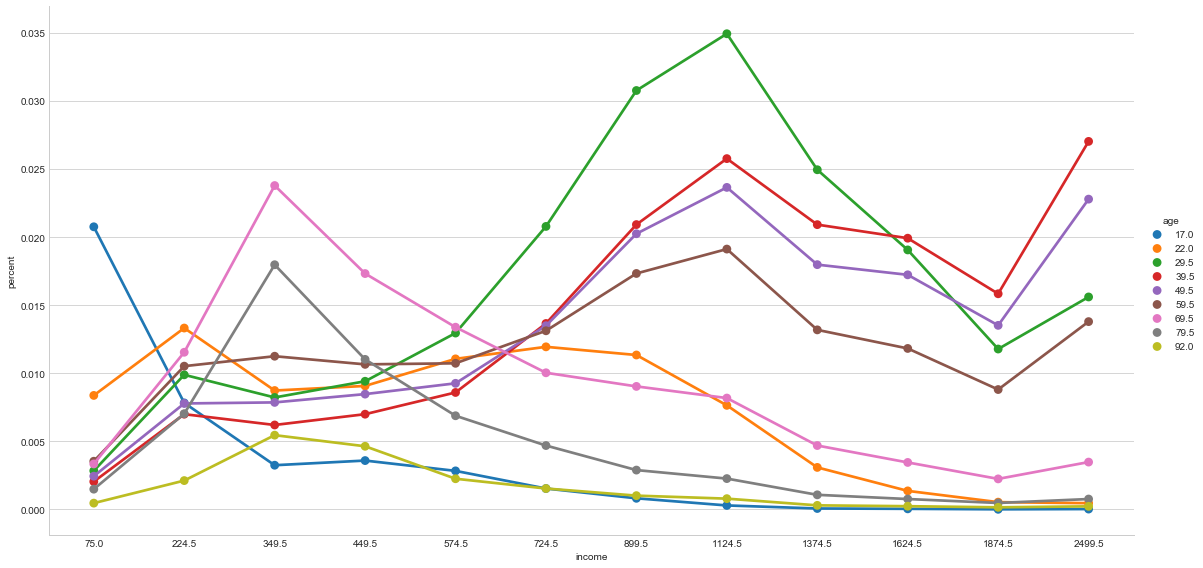

In [27]:
# hue is 'age', male only
g = sns.factorplot(x='income', 
                   y="percent", 
                   kind='point', 
                   hue='age', 
                   data=incomes[incomes['gender'] == 'M'], 
                   estimator=sum, 
                   size=8,
                   aspect=2)

# Explore the population based on postal area (post code)

Population distribution:

* Help us better understand the impact of the variable 'postal areas' (POA)
* This is difficult to see information due to high concerntration of low populations.

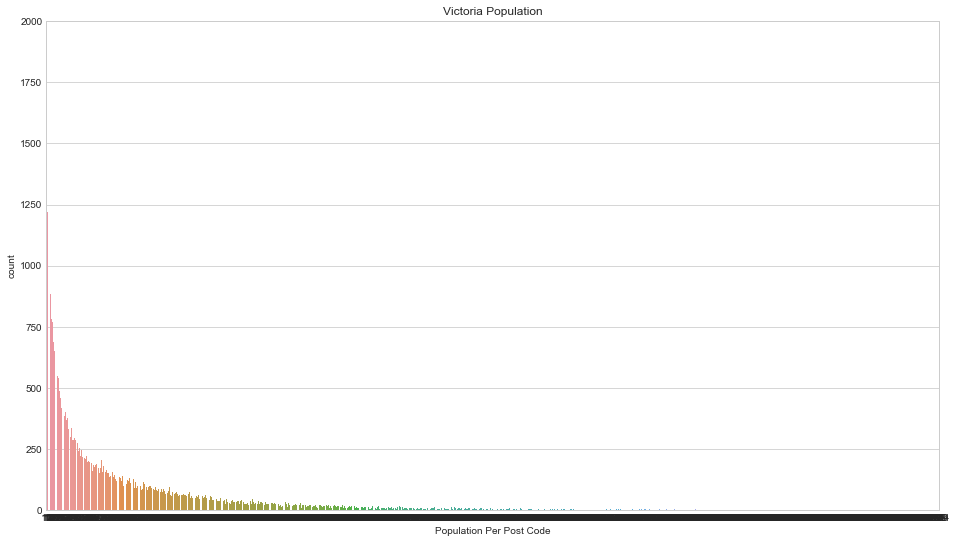

In [28]:
plt.rcParams["figure.figsize"] = [16,9]
g = sns.countplot(x="number", data=vic_p[vic_p['number']>10])
plt.xlabel('Population Per Post Code')
plt.title('Victoria Population')
g.set(ylim=(0, 2000));

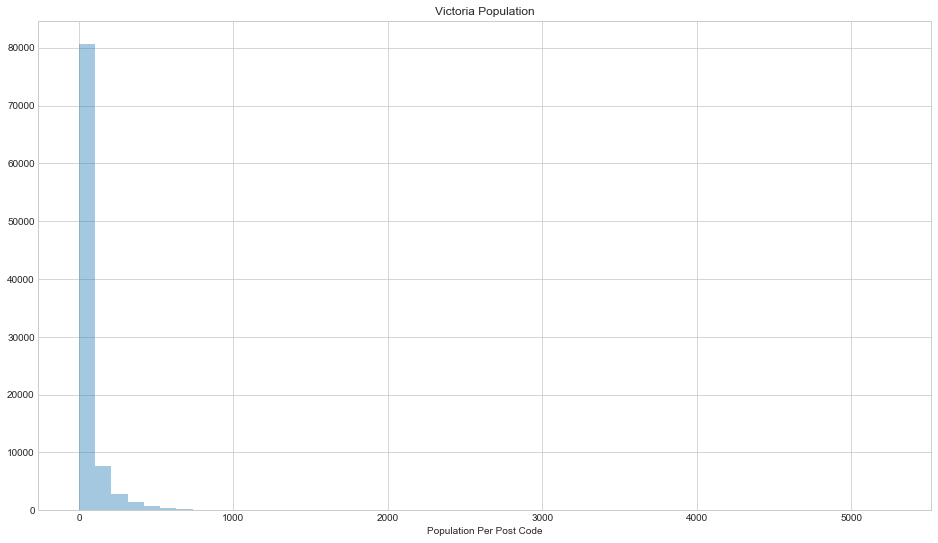

In [29]:
sns.distplot(vic_p['number'], kde=False)
# plt.rcParams["figure.figsize"] = [16,9]
plt.xlabel('Population Per Post Code')
plt.title('Victoria Population');

## Female incomes in top and bottom 10 post-code areas
Compare income distribution of females in top 10 and bottom 10 weekly-income post-code areas

In [30]:
vic_f_poa_income = vic_f.groupby('postcode')['number', 'total_income'].sum()
vic_f_poa_income['avg_income'] = vic_f_poa_income['total_income'] / vic_f_poa_income['number']
vic_f_poa_income_top10 = vic_f_poa_income.nlargest(10, 'avg_income')
vic_f_poa_income_top10

,number,total_income,avg_income
postcode,,,
POA3852,8,7196.0,899.500000
POA3378,19,16717.0,879.842105
POA3184,7203,6286481.0,872.758712
POA3002,2433,2119176.0,871.013564
POA3121,14028,11910936.5,849.083013
POA3068,8544,7227207.5,845.881028
POA3067,3791,3182655.0,839.529148
POA3207,7372,6144966.0,833.554802
POA3181,9594,7916443.5,825.145247


In [31]:
vic_f_poa_income = vic_f.groupby('postcode')['number', 'total_income'].sum()
vic_f_poa_income['avg_income'] = vic_f_poa_income['total_income'] / vic_f_poa_income['number']
vic_f_poa_income_bottom10 = vic_f_poa_income.nsmallest(10, 'avg_income')
vic_f_poa_income_bottom10

,number,total_income,avg_income
postcode,,,
POA3506,3,0.0,0.000000
POA3050,24,3373.5,140.562500
POA3010,856,144725.0,169.071262
POA3086,511,90118.5,176.357143
POA3800,1107,199790.5,180.479223
POA3271,31,5819.5,187.725806
POA3026,7,1348.5,192.642857
POA3045,37,7498.0,202.648649
POA3520,58,11858.0,204.448276


In [32]:
vic_f_poa_income_top10 = vic_f_poa_income_top10.reset_index()
vic_f_poa_income_bottom10 = vic_f_poa_income_bottom10.reset_index()
vic_f_poa_income = vic_f_poa_income.reset_index()

[(0, 1200)]

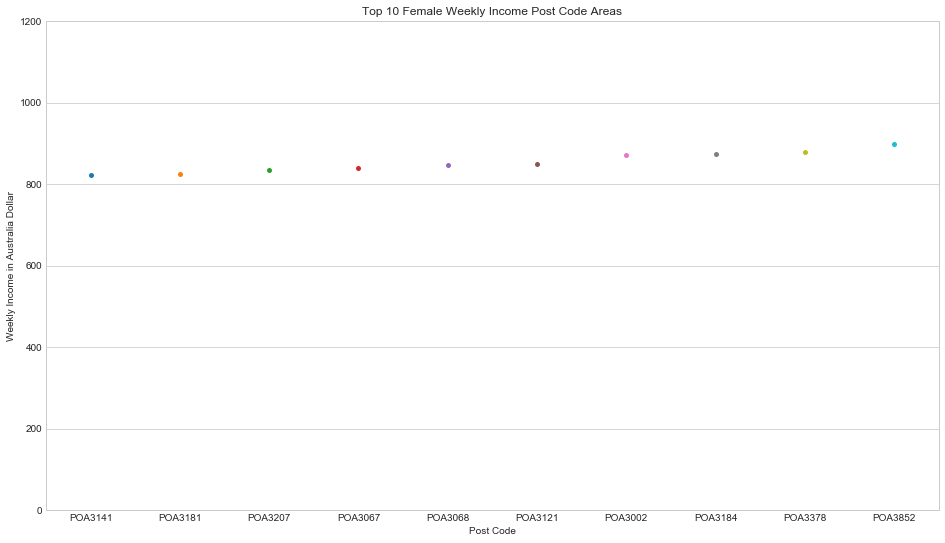

In [33]:
g = sns.stripplot(x='postcode', y='avg_income', data=vic_f_poa_income_top10.sort_values(by='avg_income'))
plt.rcParams["figure.figsize"] = [8, 5]
g.set(title='Top 10 Female Weekly Income Post Code Areas')
g.set(xlabel='Post Code')
g.set(ylabel='Weekly Income in Australia Dollar')
g.set(ylim=(0, 1200))

[(0, 1200)]

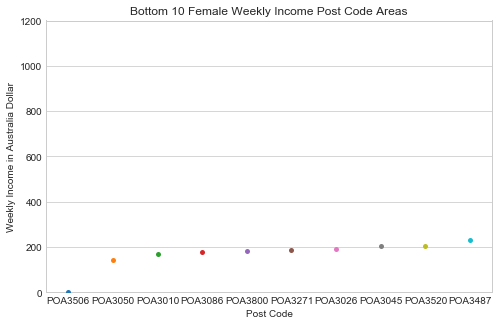

In [34]:
g = sns.stripplot(x='postcode', y='avg_income', data=vic_f_poa_income_bottom10.sort_values(by='avg_income'))
plt.rcParams["figure.figsize"] = [7, 4]
g.set(title='Bottom 10 Female Weekly Income Post Code Areas')
g.set(xlabel='Post Code')
g.set(ylabel='Weekly Income in Australia Dollar')
g.set(ylim=(0, 1200))

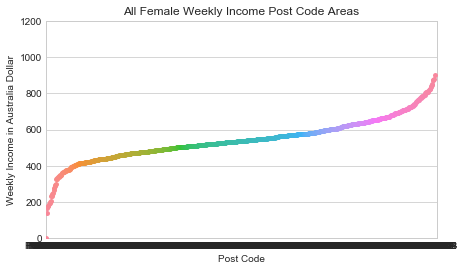

In [35]:
g = sns.stripplot(x='postcode', y='avg_income', data=vic_f_poa_income.sort_values(by='avg_income'))
plt.rcParams["figure.figsize"] = [10, 6]
# g.set_xticklabels(rotation=30)
g.set(title='All Female Weekly Income Post Code Areas')
g.set(xlabel='Post Code')
g.set(ylabel='Weekly Income in Australia Dollar')
g.set(ylim=(0, 1200));

# The male population of corresponding three charts

Male incomes in top and bottom 10 post-code areas

In [36]:
vic_m_poa_income = vic_m.groupby('postcode')['number', 'total_income'].sum()
vic_m_poa_income['avg_income'] = vic_m_poa_income['total_income'] / vic_m_poa_income['number']
vic_m_poa_income_top10 = vic_m_poa_income.nlargest(10, 'avg_income')
vic_m_poa_income_top10

,number,total_income,avg_income
postcode,,,
POA3662,509,601306.0,1181.347741
POA3852,54,60499.5,1120.361111
POA3027,2454,2457898.0,1001.588427
POA3766,480,480598.0,1001.245833
POA3695,152,151756.5,998.398026
POA3760,137,136146.0,993.766423
POA3785,12,11920.5,993.375000
POA3094,3442,3382182.0,982.621150
POA3854,513,501376.5,977.342105


In [37]:
vic_m_poa_income = vic_m.groupby('postcode')['number', 'total_income'].sum()
vic_m_poa_income['avg_income'] = vic_m_poa_income['total_income'] / vic_m_poa_income['number']
vic_m_poa_income_bottom10 = vic_m_poa_income.nsmallest(10, 'avg_income')
vic_m_poa_income_bottom10

,number,total_income,avg_income
postcode,,,
POA3086,347,49575.0,142.867435
POA3489,6,1048.5,174.750000
POA3800,1070,196725.5,183.855607
POA3010,704,149557.0,212.438920
POA3415,3,673.5,224.500000
POA3889,72,17379.0,241.375000
POA3050,33,8172.0,247.636364
POA3045,37,9998.0,270.216216
POA3520,60,16653.5,277.558333


In [38]:
vic_m_poa_income_top10 = vic_m_poa_income_top10.reset_index()
vic_m_poa_income_bottom10 = vic_m_poa_income_bottom10.reset_index()
vic_m_poa_income = vic_m_poa_income.reset_index()

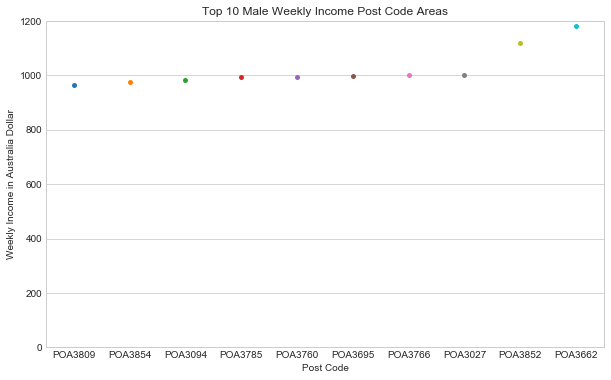

In [39]:
g = sns.stripplot(x='postcode', y='avg_income', data=vic_m_poa_income_top10.sort_values(by='avg_income'))
plt.rcParams["figure.figsize"] = [10, 6]
g.set(title='Top 10 Male Weekly Income Post Code Areas')
g.set(xlabel='Post Code')
g.set(ylabel='Weekly Income in Australia Dollar')
g.set(ylim=(0, 1200));

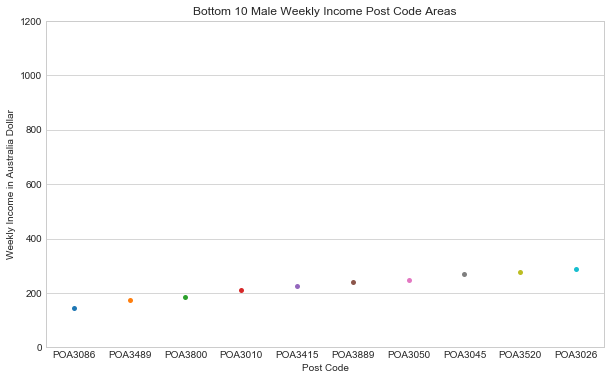

In [40]:
g = sns.stripplot(x='postcode', y='avg_income', data=vic_m_poa_income_bottom10.sort_values(by='avg_income'))
plt.rcParams["figure.figsize"] = [10, 6]
# g.set_xticklabels(rotation=30)
g.set(title='Bottom 10 Male Weekly Income Post Code Areas')
g.set(xlabel='Post Code')
g.set(ylabel='Weekly Income in Australia Dollar')
g.set(ylim=(0, 1200));

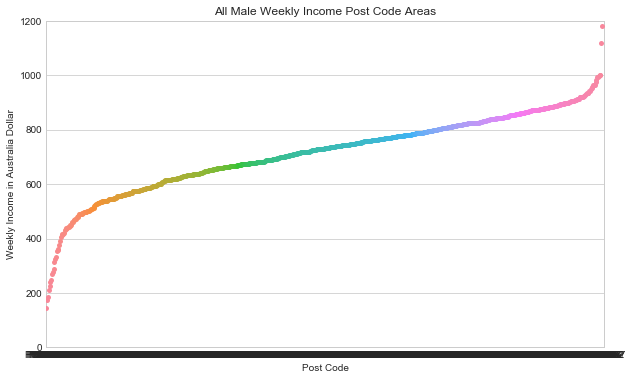

In [41]:
g = sns.stripplot(x='postcode', 
                  y='avg_income', 
                  data=vic_m_poa_income.sort_values(by='avg_income'))
plt.rcParams["figure.figsize"] = [10, 6]
g.set(title='All Male Weekly Income Post Code Areas')
g.set(xlabel='Post Code')
g.set(ylabel='Weekly Income in Australia Dollar')
g.set(ylim=(0, 1200));

## Female and Male Weekly Income Average in each postal area.

This chart shows interesting distributions of female and male weekly income averages.

It is not scientific to plot a point of 10 people with another of 1000 together but it's interesting to see the shape of distribution as well as the way male averages have been consisently above the female ones.

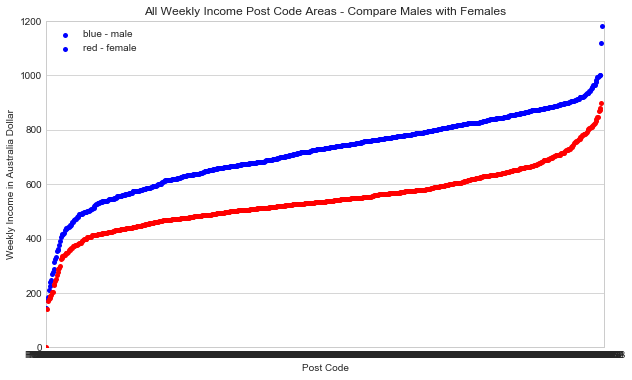

In [42]:
fig, ax = plt.subplots()
g = sns.stripplot(x='postcode', y='avg_income', data=vic_m_poa_income.sort_values(by='avg_income'), ax=ax, color='b')
g = sns.stripplot(x='postcode', y='avg_income', data=vic_f_poa_income.sort_values(by='avg_income'), ax=ax, color='r')
g.set(title='All Weekly Income Post Code Areas - Compare Males with Females')
g.set(xlabel='Post Code')
g.set(ylabel='Weekly Income in Australia Dollar')
g.set(ylim=(0, 1200))
ax.legend(['blue - male', 'red - female'], loc=2);  # loc = 2, upper left

# Extra variable - Gross

Inspired by GDP, I create a new secondary variable "gross" by multiplying "income" and "percent". That is, each income times the population percentage it has. I see it as the population's fiscal contribution.

We cannot really see a correlation for gross and age.


In [43]:


income_age = vic.groupby(['gender', 'income', 'age'])['number'].sum()
income_age = income_age.reset_index()

# use the same viarables
# vic_f_pop = df_income_brackets[df_income_brackets['gender']=='F']['number'].sum()
# vic_m_pop = df_income_brackets[df_income_brackets['gender']=='M']['number'].sum()
# vic_p_pop = vic_f_pop + vic_m_pop

income_age['percent'] = 0
income_age['percent'] = np.where(income_age['gender'] == 'F', 
                                 income_age['number']/vic_f_pop,
                                 income_age['percent'])

income_age['percent'] = np.where(income_age['gender'] == 'M', 
                                 income_age['number']/vic_m_pop,
                                 income_age['percent'])

income_age['percent'] = np.where(income_age['gender'] == 'P', 
                                 income_age['number']/vic_p_pop,
                                 income_age['percent'])

income_age['gross'] = income_age['income'] * income_age['percent']

In [44]:
income_age.tail()

,gender,income,age,number,percent,gross
319,P,2499.5,49.5,58992,0.015673,39.174520
320,P,2499.5,59.5,35007,0.009301,23.246922
321,P,2499.5,69.5,9202,0.002445,6.110726
322,P,2499.5,79.5,2469,0.000656,1.639576
323,P,2499.5,92.0,943,0.000251,0.626213


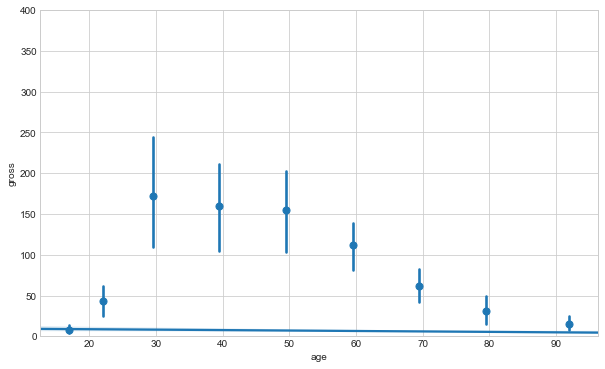

In [45]:
g = sns.regplot(x='age', y='gross', x_estimator=np.sum, data=income_age[income_age['gender'] == 'F'])
g.set(ylim=(0, 400));

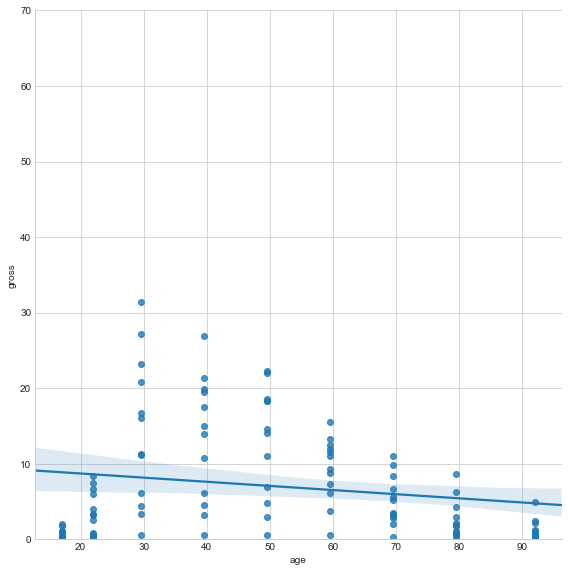

In [46]:
g = sns.lmplot(x='age', y='gross', data=income_age[income_age['gender'] == 'F'], size=8)
g.set(ylim=(0, 70));

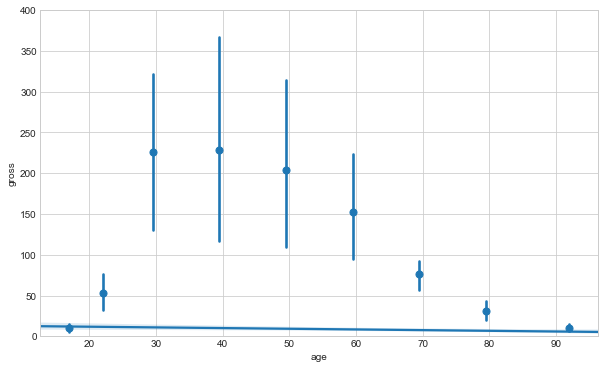

In [47]:
g = sns.regplot(x='age', y='gross', x_estimator=np.sum, data=income_age[income_age['gender'] == 'M'])
g.set(ylim=(0, 400));

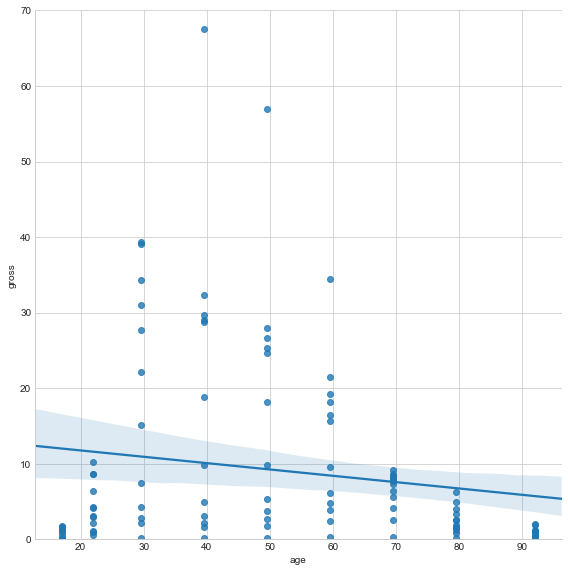

In [48]:
g = sns.lmplot(x='age', y='gross', data=income_age[income_age['gender'] == 'M'], size=8)
g.set(ylim=(0, 70));

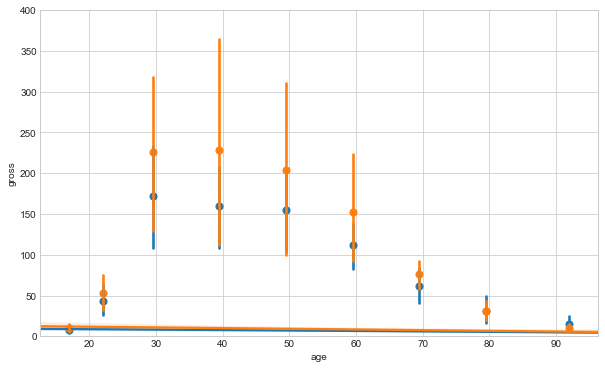

In [49]:
g = sns.regplot(x='age', y='gross', x_estimator=np.sum, data=income_age[income_age['gender'] == 'F'])
g = sns.regplot(x='age', y='gross', x_estimator=np.sum, data=income_age[income_age['gender'] == 'M'])
g.set(ylim=(0, 400));

# Age vs gross

Still we tell ages influence the gross as well as gender. 
* Male groups consistently outperform its corresponding female groups.
* The gross is bigger around 29.5 to 49.5 for males while the gross in female reaches its peak at 39.5 and gradually declines from there.


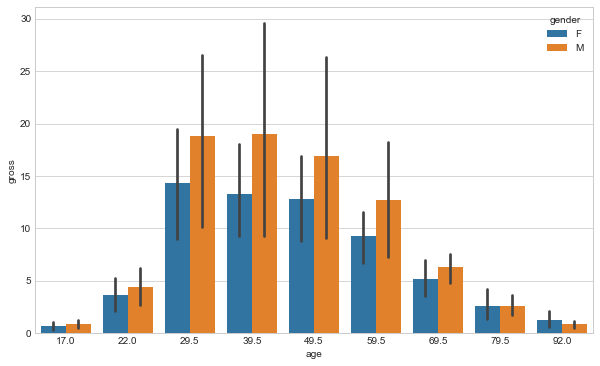

In [50]:
ax = sns.barplot(x="age", y="gross", hue="gender", data=income_age[income_age['gender'] != 'P'])

### Subgroups 

* age vs percent
* age vs gross

The violinplot plot shows us the distribution of percents in each subgroup.
- We can tell how spreadout a group is and it may help with further investigation.

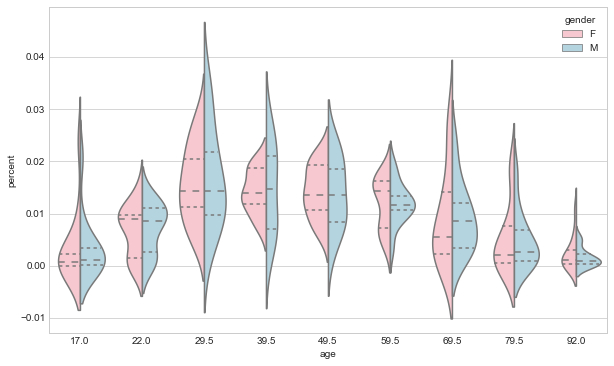

In [51]:
sns.violinplot(x='age', y='percent', hue='gender', data=income_age[income_age['gender'] != 'P'], split=True,
               inner="quart", palette={"M": "lightblue", "F": "pink"})

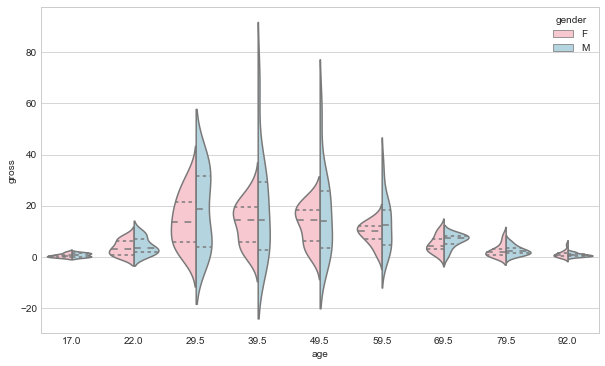

In [52]:
sns.violinplot(x='age', y='gross', hue='gender', data=income_age[income_age['gender'] != 'P'], split=True,
               inner="quart", palette={"M": "lightblue", "F": "pink"})

### Gross and Age groups

The new variable "gross" doesn't really provide more insights for exploring each age group

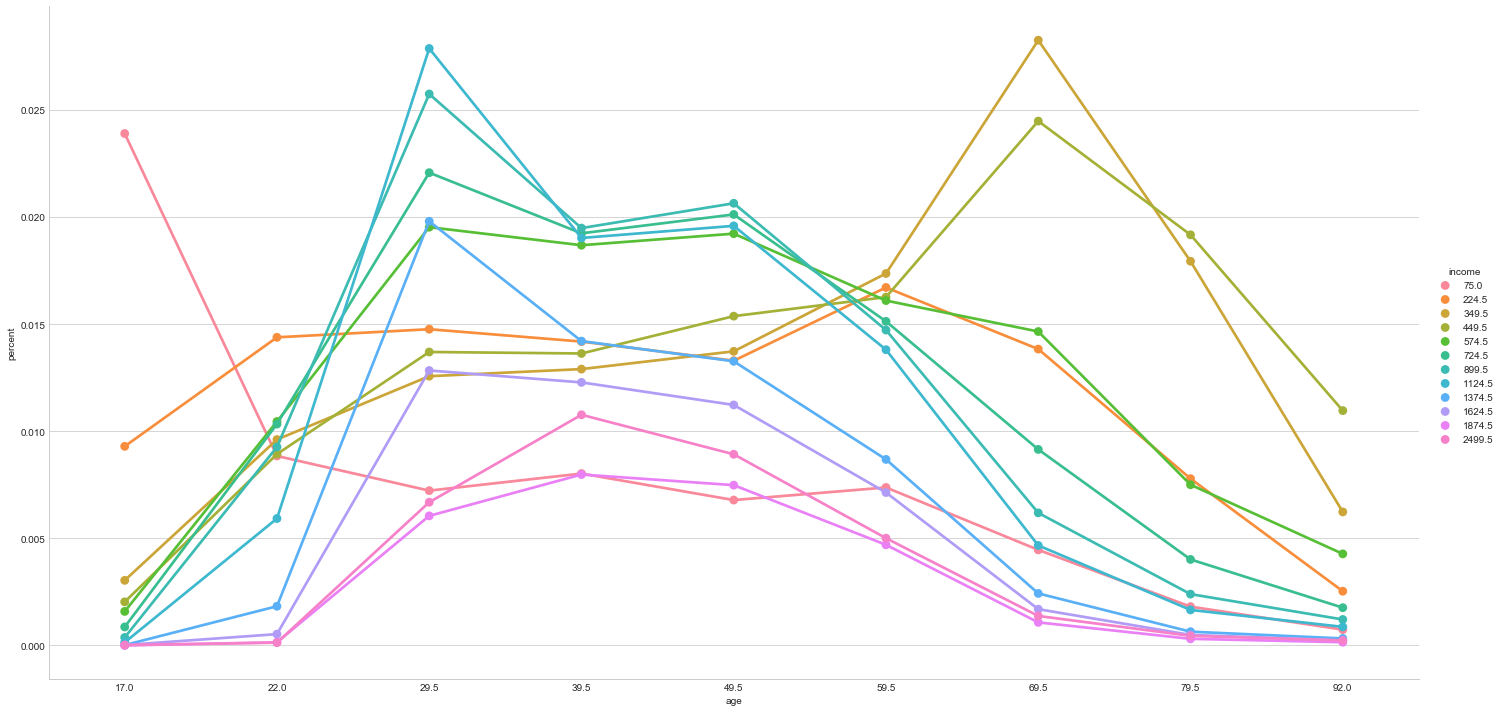

In [53]:
sns.factorplot(x='age', y='percent', hue='income', data=income_age[income_age['gender'] == 'F'], size=10, aspect=2)

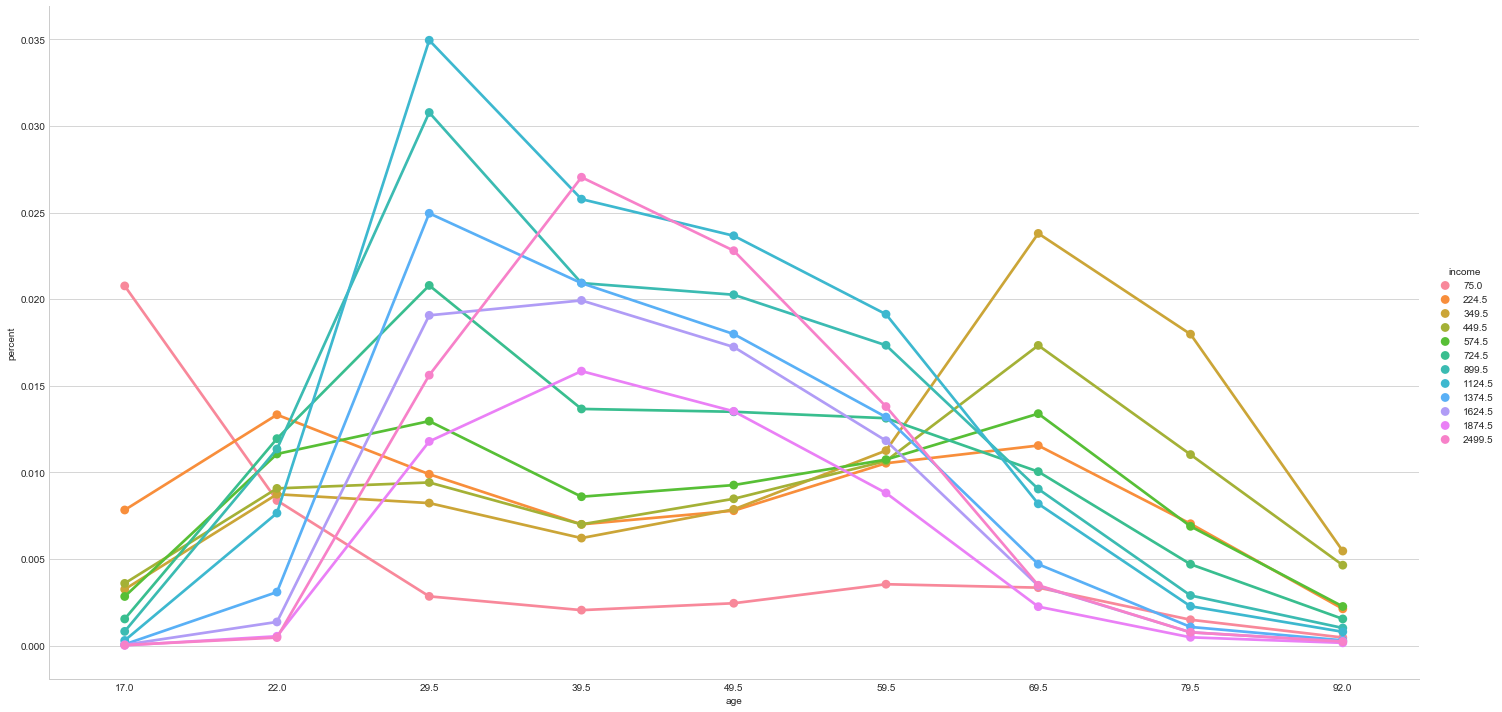

In [54]:
sns.factorplot(x='age', y='percent', hue='income', data=income_age[income_age['gender'] == 'M'], size=10, aspect=2)

# Conslusion

Before I started the course, I asked the following questions:

1. Is Australian weekly income associated with gender?
2. Is Australian weekly income associated with the post code?

For question 1, our exploration shows that it is highly like that gender has an influence on income. Males tend to earn more than their female counterpart regardless of their age and residence.

For question 2, I don't think I have enough information to say one way or the other. I can tell which postal areas have higher or lower income. But the reasons behind it seem missing in the data set. 
